            FCR_mean_RDOsat_percent_9_adjusted  FCR_mean_EXOChla_ugL_1  \
Date                                                                     
2019-01-01                           79.193493               10.185208   
2019-01-02                           78.310501                9.199697   
2019-01-03                           77.416137                9.402113   
2019-01-04                           76.073584               11.471528   
2019-01-05                           76.080610               10.040699   
...                                        ...                     ...   
2024-12-27                           84.292142               33.029645   
2024-12-28                           81.380714               31.953028   
2024-12-29                           81.735238               35.062553   
2024-12-30                           84.426781               31.446525   
2024-12-31                           83.491338               30.792340   

            FCR_mean_EXOfDOM_QSU_1  F

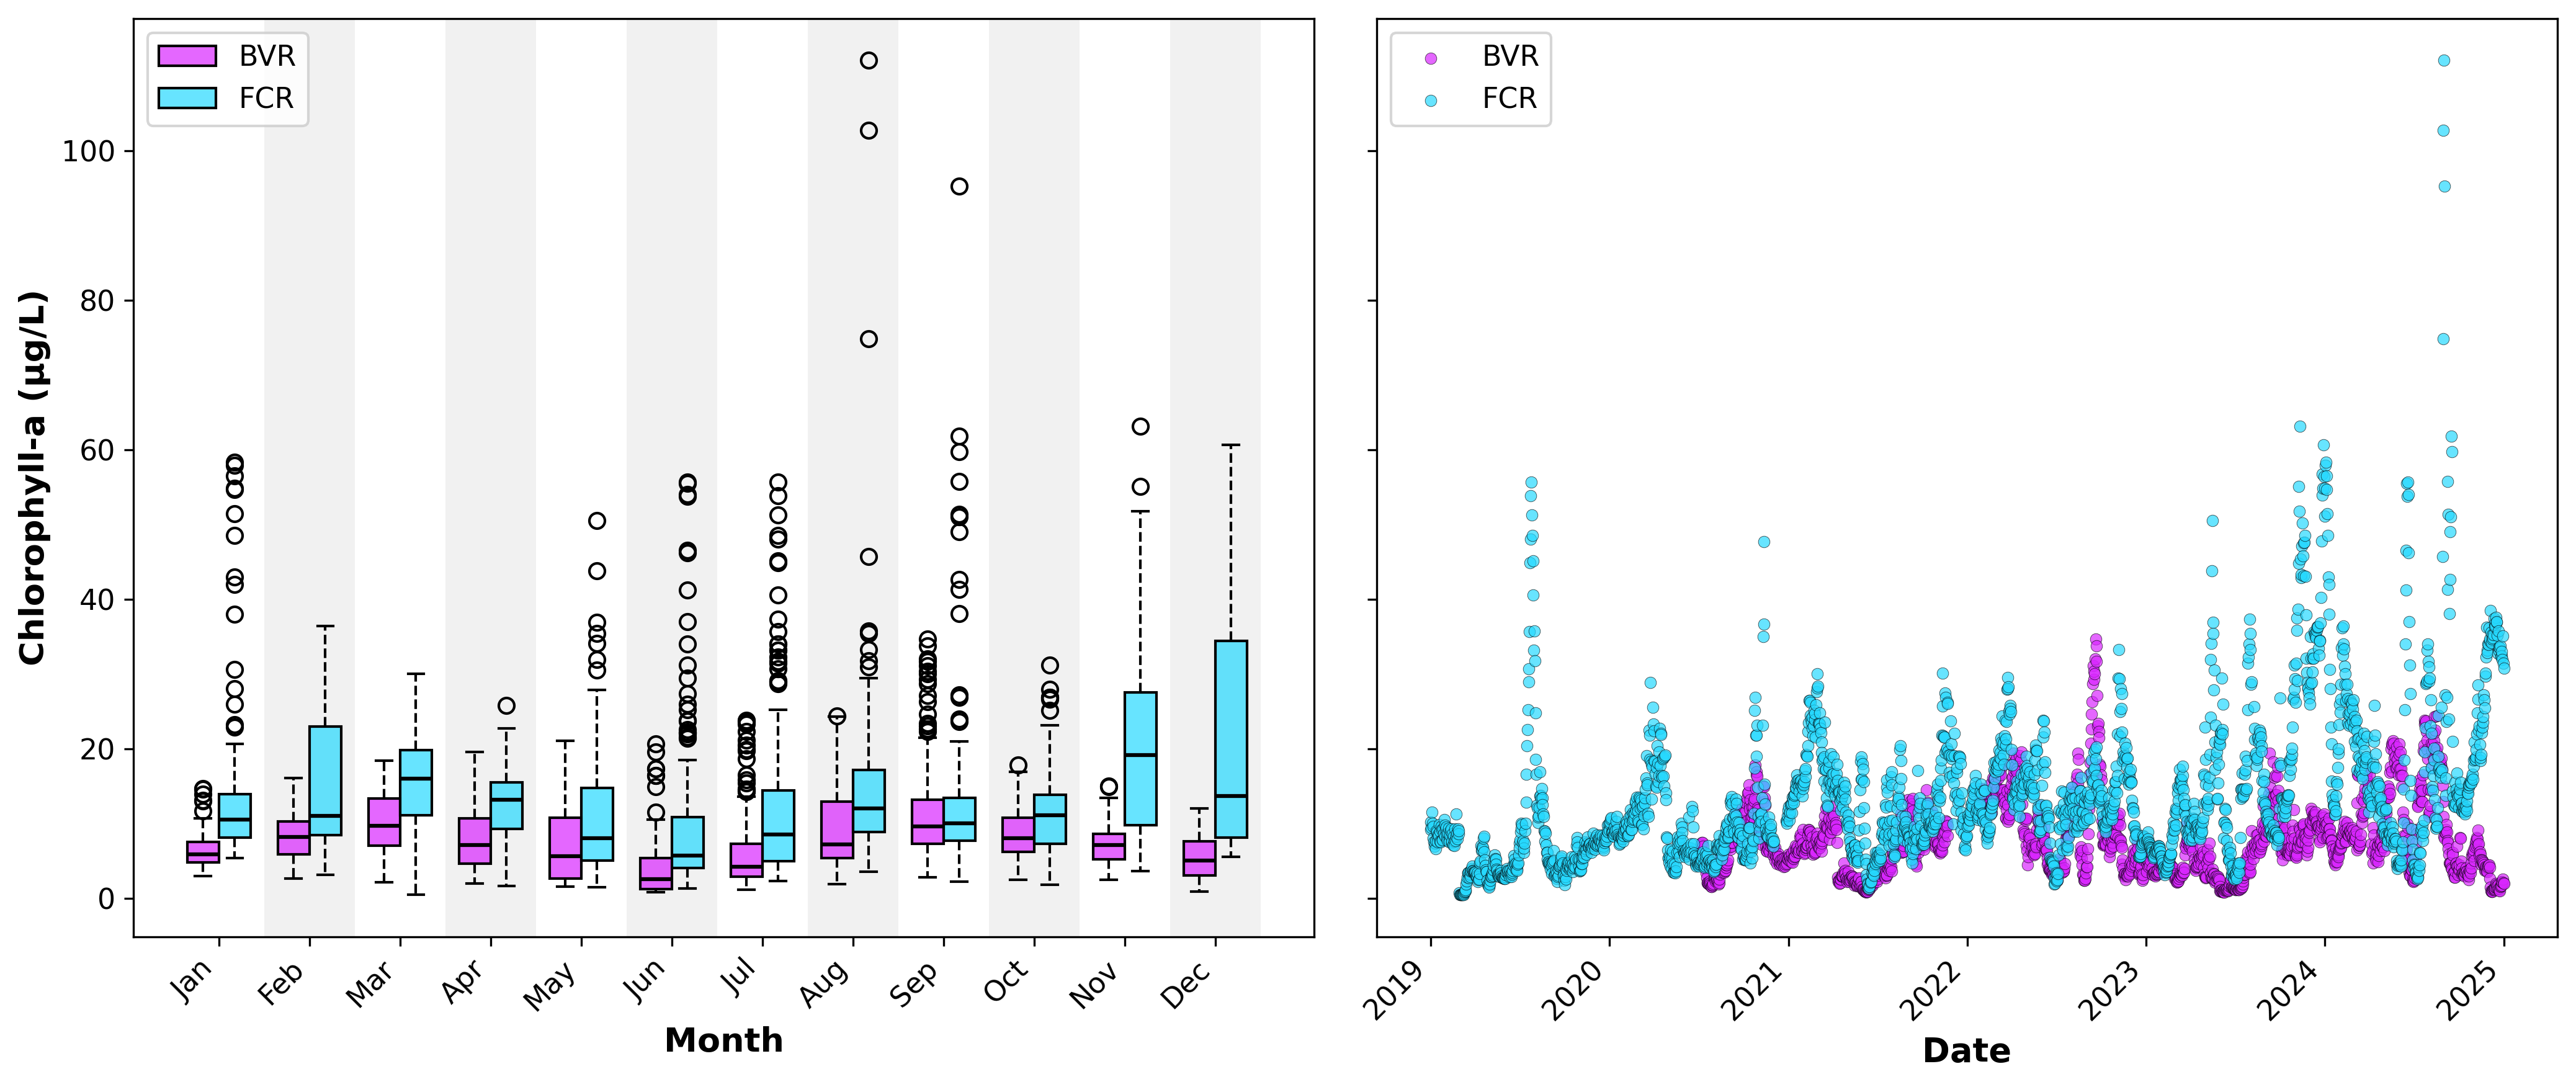

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# ─── Color Setup ───────────────────────────────────────────────────────────────
cmap = plt.get_cmap("cool")
col_bvr = list(cmap(0.85)); col_bvr[3] = 0.7
col_fcr = list(cmap(0.15)); col_fcr[3] = 0.7

# ─── Load data ────────────────────────────────────────
df_all = pd.read_csv("FCR_BVR_Met_daily_obs_2019_2024.csv", parse_dates=["Date"])
df_all = df_all.set_index("Date").sort_index()
#print(df_all)

# Select Chlorophyll-a

bvr_cols = ["BVR_mean_EXOChla_ugL_1.5"]
fcr_cols = ["FCR_mean_EXOChla_ugL_1"]


bvr_chl = next((c for c in bvr_cols if c in df_all.columns), None)
fcr_chl = next((c for c in fcr_cols if c in df_all.columns), None)


# Build dataframes 
bvr = df_all[[bvr_chl]].dropna()
fcr = df_all[[fcr_chl]].dropna()

# Selecting Month for grouping 
bvr["month"] = bvr.index.month
fcr["month"] = fcr.index.month

# plotting setup
plt.rcParams.update({
    'font.size':       12,
    'axes.titlesize':  14,
    'axes.labelsize':  13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'figure.dpi':      300
})

month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months = np.arange(1, 13)

# ─── Filter Months with Data ───────────────────────────────────────────────────
data_bvr, data_fcr, valid_months, valid_labels = [], [], [], []
for m in months:
    bvr_data = bvr.loc[bvr['month'] == m, bvr_chl].dropna().values
    fcr_data = fcr.loc[fcr['month'] == m, fcr_chl].dropna().values
    if len(bvr_data) > 0 or len(fcr_data) > 0:
        valid_months.append(m)
        valid_labels.append(month_labels[m-1])
        data_bvr.append(bvr_data if len(bvr_data) > 0 else np.array([]))
        data_fcr.append(fcr_data if len(fcr_data) > 0 else np.array([]))

# ─── Combined Figure────────────────────────────────────────────
fig, (ax_box, ax_scatter) = plt.subplots(1, 2, figsize=(14, 6), dpi=300, sharey=True)

# Alternating month shades
for m in months:
    if m % 2 == 0:
        ax_box.axvspan(m - 0.5, m + 0.5, facecolor='lightgrey', alpha=0.3, zorder=0)

# ---- A) Monthly Boxplots ----
width = 0.35
bp1 = ax_box.boxplot(
    data_bvr,
    positions=np.array(valid_months) - width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=tuple(col_bvr), edgecolor='black'),
    medianprops=dict(color='black', linewidth=1.5),
    whiskerprops=dict(color='black', linestyle='--'),
    capprops=dict(color='black'),
    manage_ticks=False
)
bp2 = ax_box.boxplot(
    data_fcr,
    positions=np.array(valid_months) + width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=tuple(col_fcr), edgecolor='black'),
    medianprops=dict(color='black', linewidth=1.5),
    whiskerprops=dict(color='black', linestyle='--'),
    capprops=dict(color='black'),
    manage_ticks=False
)

ax_box.set_xticks(valid_months)
ax_box.set_xticklabels(valid_labels, rotation=45, ha='right')
ax_box.set_xlabel("Month", fontweight='bold')
ax_box.set_ylabel("Chlorophyll-a (µg/L)", fontweight='bold')
#ax_box.set_title("Monthly Chlorophyll-a", fontweight='bold')
ax_box.legend([bp1["boxes"][0], bp2["boxes"][0]], ["BVR", "FCR"], loc='upper left')

# ---- B) Scatter Time-Series ----
ax_scatter.scatter(
    bvr.index, bvr[bvr_chl],
    color=tuple(col_bvr[:3]), alpha=0.7, edgecolor='black', linewidth=0.2, s=20, label="BVR"
)
ax_scatter.scatter(
    fcr.index, fcr[fcr_chl],
    color=tuple(col_fcr[:3]), alpha=0.7, edgecolor='black', linewidth=0.2, s=20, label="FCR"
)
ax_scatter.set_xlabel("Date", fontweight='bold')
ax_scatter.legend(frameon=True)
ax_scatter.xaxis.set_major_locator(mdates.YearLocator())
ax_scatter.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("chlorophyll-a_bvr_fcr_monthly_yearly.png", bbox_inches='tight')
plt.show()